In [160]:
import pandas as pd
import seaborn as sns

In [161]:
data = pd.read_csv("smartcart_customers.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [163]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

###### Handle Missing Value

In [164]:
data["Income"] = data["Income"].fillna(data["Income"].median())

###### Feature Engineering 

In [165]:
# Age 
data["age"] = 2026 - data["Year_Birth"]

In [166]:
# No of Days Customer Joined
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)

referense_date = data["Dt_Customer"].max()

data["cust_tenure_days"] = (referense_date - data["Dt_Customer"]).dt.days

In [167]:
# Purchasing Amount
data["total_purchase_amt"] = data["MntWines"] + data["MntSweetProducts"] + data["MntGoldProds"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"]

In [168]:
# Number of Children in home
data["children"] = data["Kidhome"] + data["Teenhome"]

In [169]:
# Education
data["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [170]:
data["Education"] = data["Education"].replace(
                        {
                            "Basic" : "Under_Graduate", "2n Cycle": "Under_Graduate",
                            "Graduation" : "Gratuate",
                            "PhD" : "Post_Graduate", "Master": "Post_Graduate"
                        }
                    )

In [171]:
# Marrital Status
data["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [172]:
data["Marital_Status"] = data["Marital_Status"].replace(
                        {
                            "Together" : "Married",
                            "Single" : "Alone",
                            "Divorced" : "Alone",
                            "Widow" : "Alone",
                            "Absurd" : "Alone",
                            "YOLO" : "Married"
                        }
                        )

###### Feature Remove

In [173]:
col = ["ID", "Year_Birth", "Kidhome", "Teenhome", "Dt_Customer", ]
spend = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

total_remove_col = col + spend
data_cleaned = data.drop(total_remove_col, axis = 1)

###### Handle Outlier

In [174]:
col = ["Income", "Recency", "Response", "age", "total_purchase_amt", "children"]

# Relative plot of some features - Pair Plots
sns.pairplot(data_cleaned[col])

###### Remove Outlier

In [175]:
data_cleaned = data_cleaned[data_cleaned["Income"] < 500000]

In [176]:
data_cleaned = data_cleaned[data_cleaned["age"] < 100]

In [177]:
data_cleaned.shape

(2236, 15)

###### HeatMap

In [178]:
# from sklearn.metrics import ConfusionMatrixDispla
numeric_col = data_cleaned.select_dtypes(include= "number") 
corr_met = numeric_col.corr()

In [179]:
data_cleaned

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age,cust_tenure_days,total_purchase_amt,children
0,Gratuate,Alone,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0
1,Gratuate,Alone,46344.0,38,2,1,1,2,5,0,0,72,113,27,2
2,Gratuate,Married,71613.0,26,1,8,2,10,4,0,0,61,312,776,0
3,Gratuate,Married,26646.0,26,2,2,0,4,6,0,0,42,139,53,1
4,Post_Graduate,Married,58293.0,94,5,5,3,6,5,0,0,45,161,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Gratuate,Married,61223.0,46,2,9,3,4,5,0,0,59,381,1341,1
2236,Post_Graduate,Married,64014.0,56,7,8,2,5,7,0,0,80,19,444,3
2237,Gratuate,Alone,56981.0,91,1,2,3,13,6,0,0,45,155,1241,0
2238,Post_Graduate,Married,69245.0,8,2,6,5,10,3,0,0,70,156,843,1


In [180]:
corr_met

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age,cust_tenure_days,total_purchase_amt,children
Income,1.000000,0.007829,-0.107169,0.450584,0.693781,0.628075,-0.646382,-0.027871,0.161121,0.198835,-0.023677,0.789375,-0.340550
Recency,0.007829,1.000000,-0.000638,-0.010776,0.025226,0.000771,-0.021850,0.005361,-0.198781,0.019396,0.024238,0.020842,0.017826
NumDealsPurchases,-0.107169,-0.000638,1.000000,0.233971,-0.008510,0.068418,0.347216,0.003636,0.002017,0.068286,0.218009,-0.064831,0.439682
NumWebPurchases,0.450584,-0.010776,0.233971,1.000000,0.378049,0.502227,-0.056204,-0.013250,0.148390,0.153873,0.191211,0.519948,-0.146429
NumCatalogPurchases,0.693781,0.025226,-0.008510,0.378049,1.000000,0.518788,-0.520376,-0.018304,0.220813,0.125285,0.095836,0.778343,-0.439631
NumStorePurchases,0.628075,0.000771,0.068418,0.502227,0.518788,1.000000,-0.429857,-0.011563,0.038702,0.139237,0.109727,0.675460,-0.321729
NumWebVisitsMonth,-0.646382,-0.021850,0.347216,-0.056204,-0.520376,-0.429857,1.000000,0.020796,-0.004397,-0.117498,0.272105,-0.499909,0.417908
Complain,-0.027871,0.005361,0.003636,-0.013250,-0.018304,-0.011563,0.020796,1.000000,0.000167,0.004450,0.035685,-0.033784,0.031480
Response,0.161121,-0.198781,0.002017,0.148390,0.220813,0.038702,-0.004397,0.000167,1.000000,-0.018557,0.194232,0.265615,-0.169451
age,0.198835,0.019396,0.068286,0.153873,0.125285,0.139237,-0.117498,0.004450,-0.018557,1.000000,-0.016451,0.113618,0.095512


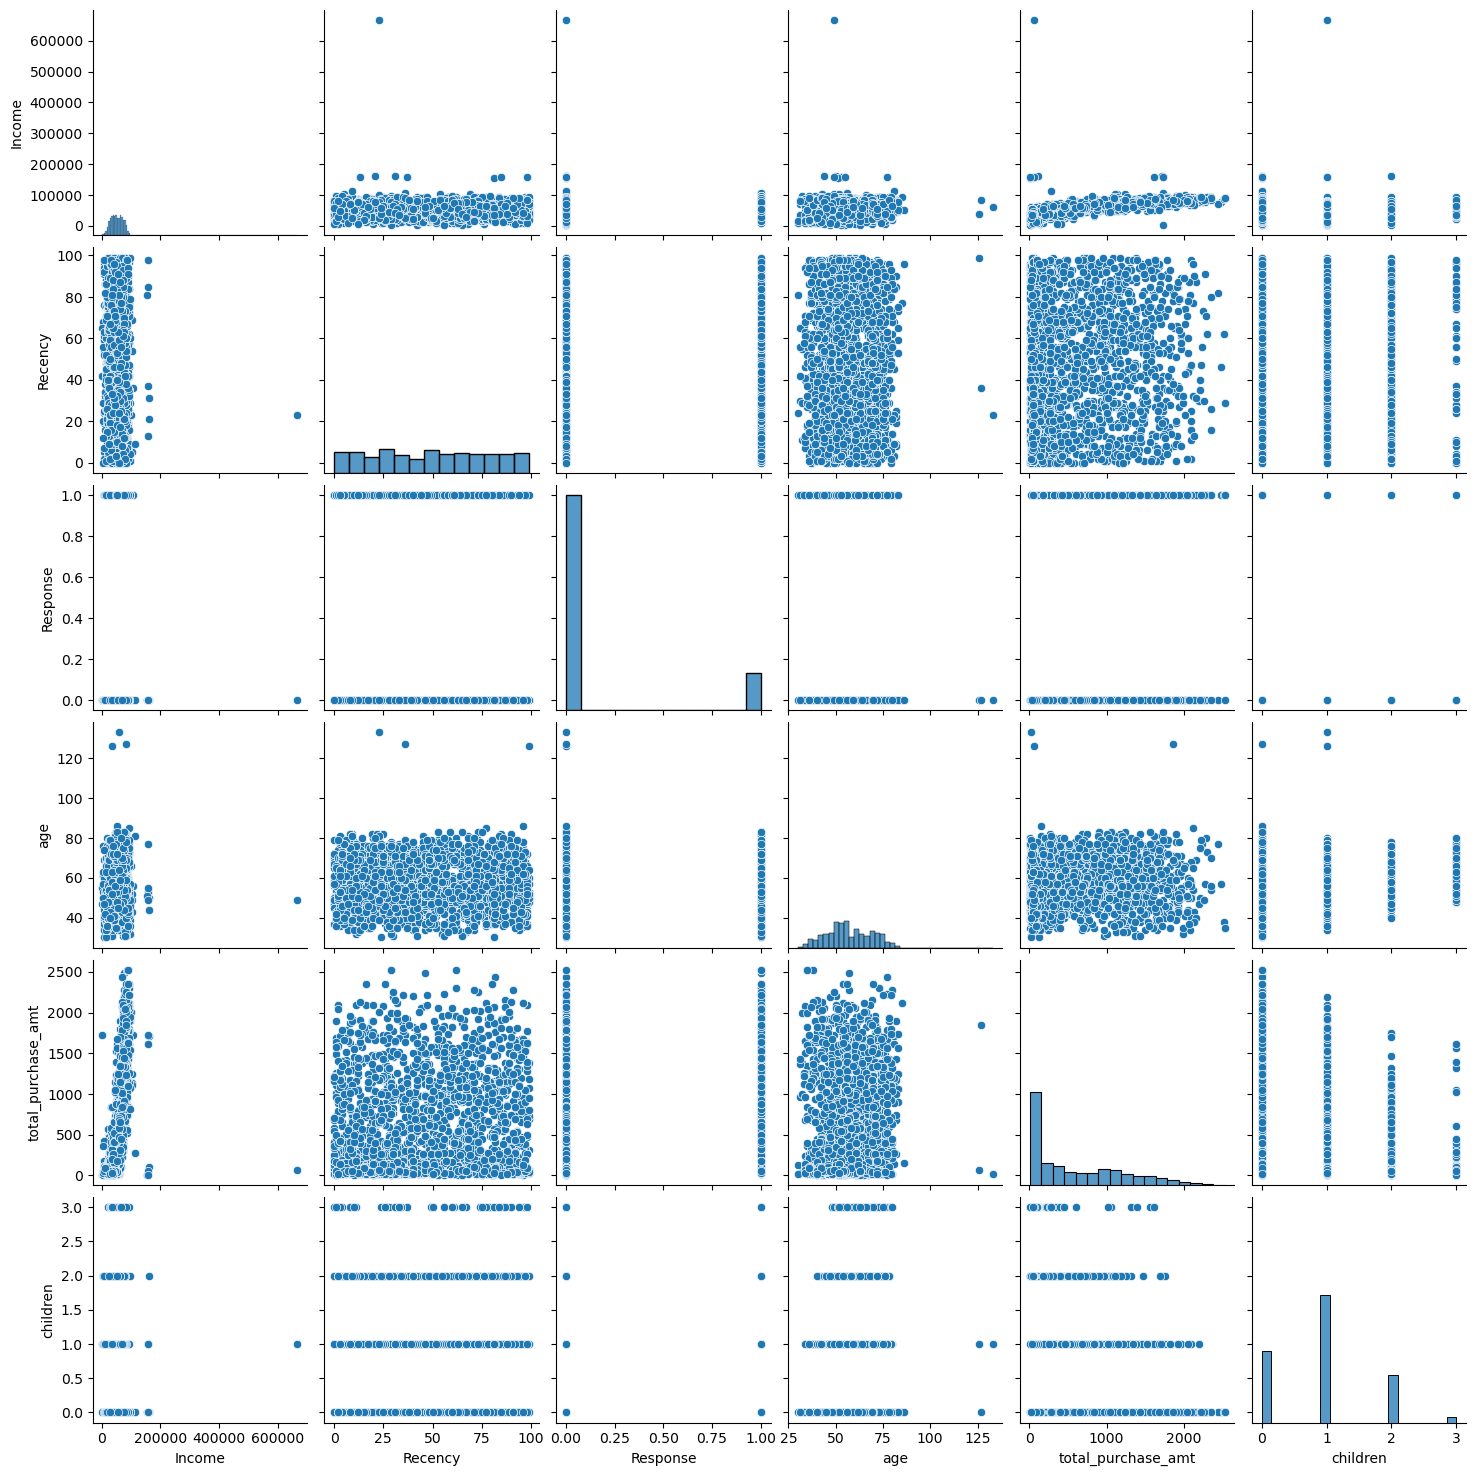

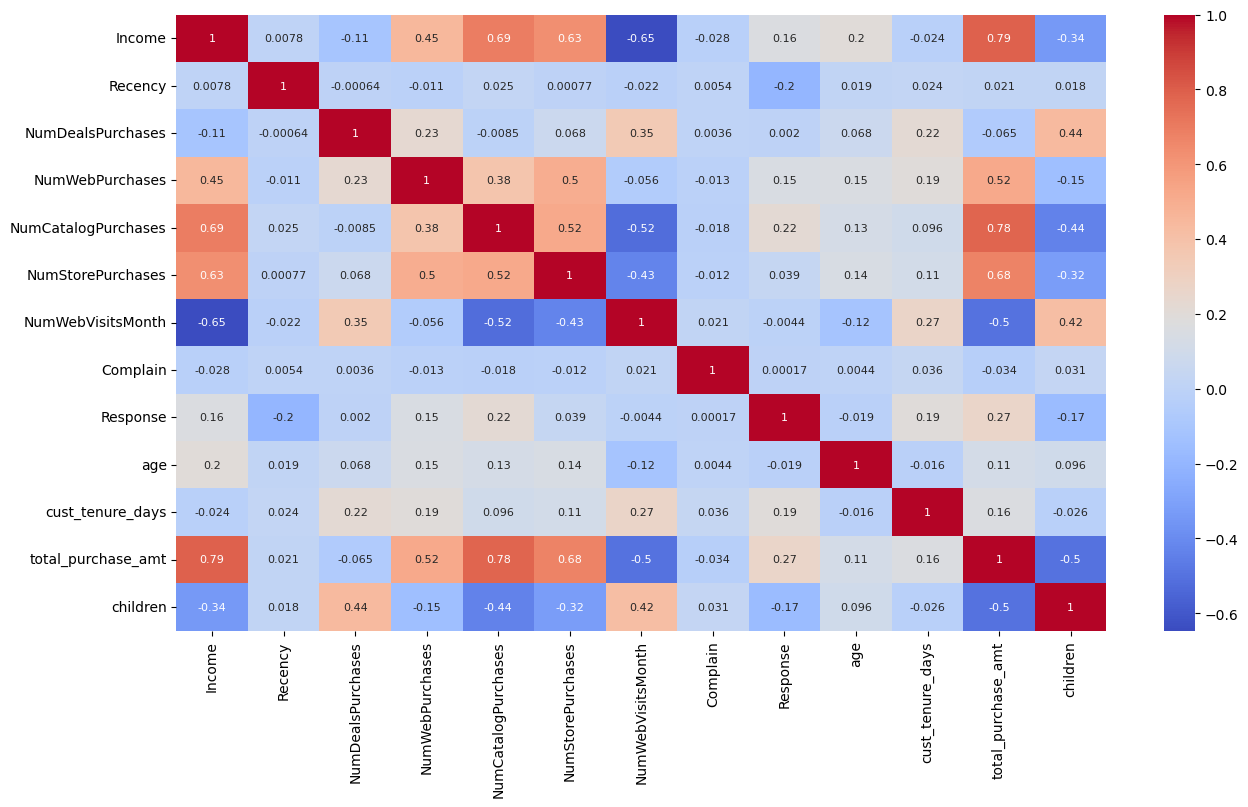

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(corr_met, 
            annot=True,
            annot_kws={"size":8},
           cmap="coolwarm")
plt.show()

In [182]:
data_cleaned.shape

(2236, 15)

##### Encoding

In [183]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [184]:
# drop="first", sparse_output=False, handle_unknown = "ignore"
ohe = OneHotEncoder()

In [185]:
ohe_col = ["Education", "Marital_Status"]

encode = ohe.fit_transform(data_cleaned[ohe_col])
x_encoded = pd.DataFrame(encode.toarray(), columns = ohe.get_feature_names_out(ohe_col), index = data_cleaned.index)

new_data = pd.concat([data_cleaned.drop(columns=ohe_col), x_encoded], axis=1)

In [186]:
new_data.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age,cust_tenure_days,total_purchase_amt,children,Education_Gratuate,Education_Post_Graduate,Education_Under_Graduate,Marital_Status_Alone,Marital_Status_Married
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


##### Scaling

In [187]:
scaler = StandardScaler()

In [188]:
x_scaled = scaler.fit_transform(new_data)

In [189]:
x_scaled

array([[ 0.28894655,  0.30685572,  0.34873831, ..., -0.35877969,
         1.3502712 , -1.3502712 ],
       [-0.262003  , -0.38397129, -0.16869955, ..., -0.35877969,
         1.3502712 , -1.3502712 ],
       [ 0.91842301, -0.7984675 , -0.68613742, ..., -0.35877969,
        -0.74059196,  0.74059196],
       ...,
       [ 0.234898  ,  1.44672029, -0.68613742, ..., -0.35877969,
         1.3502712 , -1.3502712 ],
       [ 0.80780332, -1.42021181, -0.16869955, ..., -0.35877969,
        -0.74059196,  0.74059196],
       [ 0.04280841, -0.31488859,  0.34873831, ..., -0.35877969,
        -0.74059196,  0.74059196]])

##### Visualize 

In [190]:
# shape
x_scaled.shape

(2236, 18)

In [191]:
#2D
from sklearn.decomposition import PCA

In [204]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_scaled)

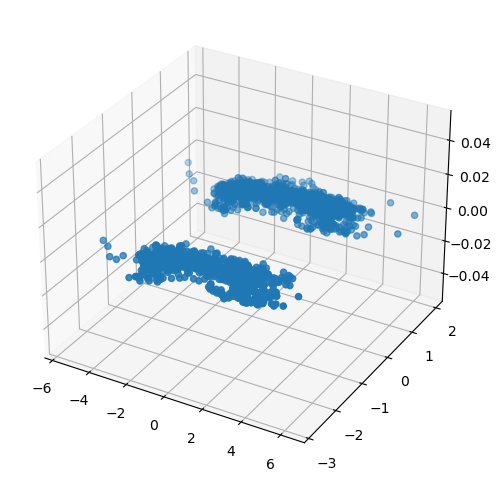

In [205]:
#plot
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection = "3d")

ax.scatter(x_pca[:,0],x_pca[:,1])
plt.show()

In [206]:
pca.explained_variance_ratio_

array([0.23163525, 0.11383262, 0.10399332])

## Analyze K(cluster) value 

In [207]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [208]:
from sklearn.cluster import KMeans

###### Elbow Method

In [209]:
from kneed import KneeLocator
wcss = []
for k in range(1,11): 
    k_mean = KMeans(n_clusters=k, random_state=42)
    k_mean.fit_predict(x_pca)
    wcss.append(k_mean.inertia_)

In [210]:
knee = KneeLocator(range(1,11),wcss, curve="convex",direction="decreasing")
optimal_k = knee.elbow

In [211]:
print("best value of k(cluster):- ",optimal_k)

best value of k(cluster):-  4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


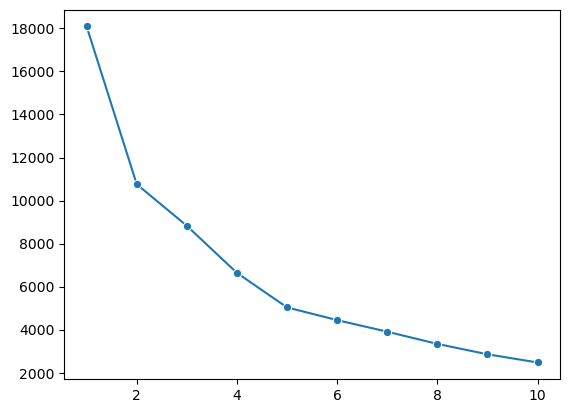

In [212]:
# plot

sns.lineplot(range(1,11),wcss, marker="o")
plt.show()

###### Silhouette Score

In [213]:
from sklearn.metrics import silhouette_score
scores = []

for s in range(2,11): 
    k_mean = KMeans(n_clusters=s, random_state=42)
    labels = k_mean.fit_predict(x_pca)
    score = silhouette_score(x_pca,labels)
    scores.append(score)

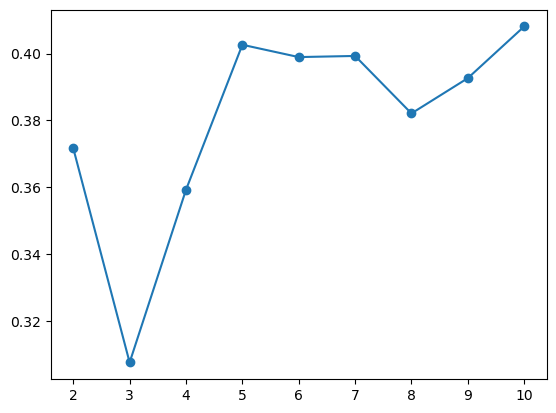

In [214]:
plt.plot(range(2,11),scores, marker="o")
plt.show()

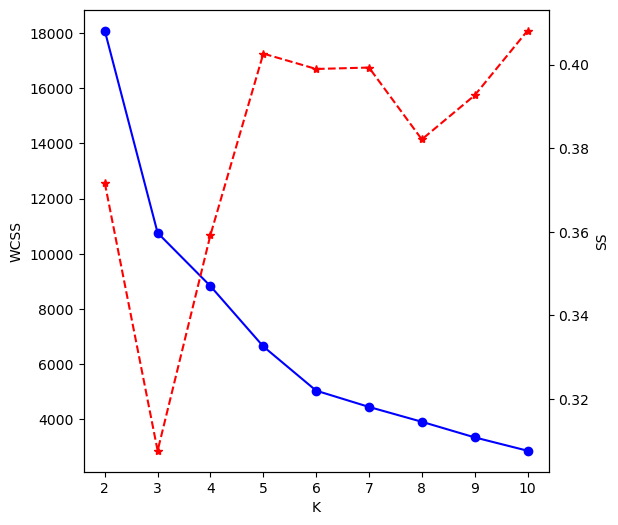

In [215]:
# Combined Plot

k_range = range(2,11)

fig, ax1 = plt.subplots(figsize=(6,6))
ax1.plot(k_range,wcss[:len(k_range)],marker="o",color="blue")
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range,scores[:len(k_range)],marker="*",color="red", linestyle="--")
ax2.set_ylabel("SS")
plt.show()

### Apply Clustering Algorithm

###### KMeans

In [217]:
kmean = KMeans(n_clusters=4, random_state = 42)
labels = kmean.fit_predict(x_pca)

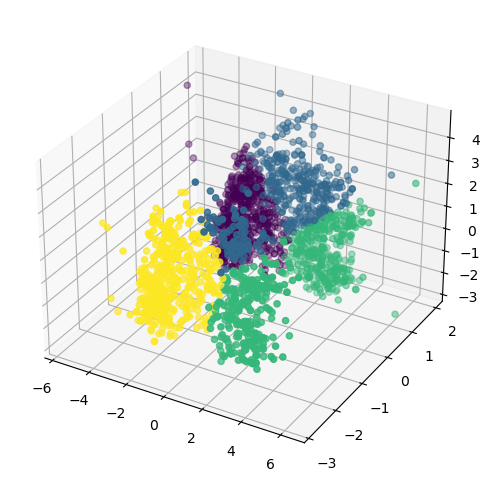

In [226]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection = "3d")

ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c= labels)
plt.show()

##### Agglomerative Clustering

In [227]:
from sklearn.cluster import AgglomerativeClustering

In [228]:
agg = AgglomerativeClustering(n_clusters=4,linkage="ward")

In [229]:
labels1 = agg.fit_predict(x_pca)

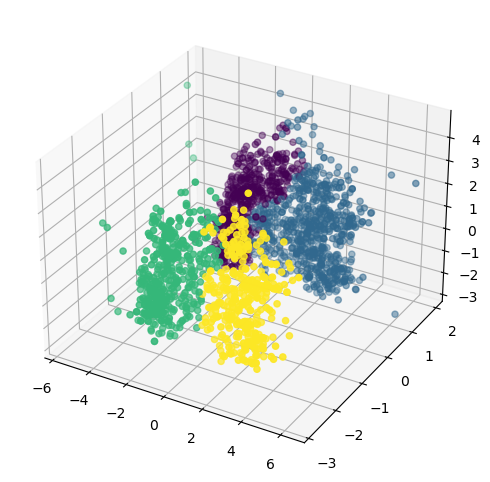

In [232]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection = "3d")

ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c= labels1)
plt.show()